Import packages

In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
import datetime as dt

Import and select data, currently only grab one route.

In [36]:
df = pds.read_csv('det-ar-lugnt/bus203.csv')
df = df[df.journey_number == 1]
df['segment'] = 0

## Find segments, will later be included in dataset
segment = 0
for index, row in df.iterrows():
    if row['event'] == "EnteredEvent":
        segment = segment+1
    df.at[index, 'segment'] = segment


df = df[df.segment == 1]
#print(df)
## Extract hour and set value between 0 and 1
#df['timestamp'] = df['timestamp'].str[11:13].astype(int)/24

first = df.iloc[0]['timestamp'].split("T")[-1].split(".")[0].split(':')
last  = df.iloc[len(df.index)-1]['timestamp'].split("T")[-1].split(".")[0].split(':')

first = dt.datetime(2018, 1,1,int(first[0]),int(first[1]), int(first[2]))
last = dt.datetime(2018, 1,1,int(last[0]),int(last[1]), int(last[2]))

diff = (last-first).seconds
## Dummy labels
df['label'] = diff


## Make segments categorical
dataset = pds.get_dummies(df['segment'])

## Combine segments and timestamp, add time from start to stop 0 for brazil model
dataset['timestamp'] = df['timestamp']




     Unnamed: 0                          timestamp                  event  \
3             3  2018-02-16T09:31:00.0000000+01:00           EnteredEvent   
4             4  2018-02-16T09:31:01.0000000+01:00  ObservedPositionEvent   
5             5  2018-02-16T09:31:02.0000000+01:00  ObservedPositionEvent   
6             6  2018-02-16T09:31:03.0000000+01:00  ObservedPositionEvent   
7             7  2018-02-16T09:31:04.0000000+01:00  ObservedPositionEvent   
8             8  2018-02-16T09:31:05.0000000+01:00  ObservedPositionEvent   
9             9  2018-02-16T09:31:06.0000000+01:00  ObservedPositionEvent   
10           10  2018-02-16T09:31:07.0000000+01:00  ObservedPositionEvent   
11           11  2018-02-16T09:31:08.0000000+01:00  ObservedPositionEvent   
12           12  2018-02-16T09:31:09.0000000+01:00  ObservedPositionEvent   
13           13  2018-02-16T09:31:10.0000000+01:00  ObservedPositionEvent   
14           14  2018-02-16T09:31:11.0000000+01:00  ObservedPositionEvent   

Divide training and test data

In [3]:
msk = np.random.rand(len(df))<0.8
train_input = dataset[msk]
test_input = dataset[~msk]

train_labels = labels[msk]
test_labels = labels[~msk]
print(len(train_input))
print(len(train_labels))

2209
2209


Build model

In [4]:
model = keras.Sequential([
	keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_input.shape[1],)),
	keras.layers.Dense(1)
	])

optimizer = tf.train.RMSPropOptimizer(0.001)
model.compile(loss='mse', optimizer = optimizer, metrics=['mae'])

Fit model

In [5]:
EPOCHS=500
model.fit(train_input.values, train_labels.values, epochs = EPOCHS)

Epoch 1/500
2209/2209 [==============================] - 0s 155us/step - loss: 264.9401 - mean_absolute_error: 13.5143
Epoch 2/500
2209/2209 [==============================] - 0s 54us/step - loss: 231.8232 - mean_absolute_error: 12.3392
Epoch 3/500
2209/2209 [==============================] - 0s 53us/step - loss: 184.9415 - mean_absolute_error: 10.7404
Epoch 4/500
2209/2209 [==============================] - 0s 49us/step - loss: 131.9136 - mean_absolute_error: 8.8653
Epoch 5/500
2209/2209 [==============================] - 0s 45us/step - loss: 81.7410 - mean_absolute_error: 6.9256
Epoch 6/500
2209/2209 [==============================] - 0s 45us/step - loss: 45.4762 - mean_absolute_error: 5.1806
Epoch 7/500
2209/2209 [==============================] - 0s 43us/step - loss: 27.2551 - mean_absolute_error: 4.0164
Epoch 8/500
2209/2209 [==============================] - 0s 45us/step - loss: 16.6860 - mean_absolute_error: 2.9313
Epoch 9/500
2209/2209 [==============================] - 0s 48us

2209/2209 [==============================] - 0s 36us/step - loss: 0.0031 - mean_absolute_error: 0.0457
Epoch 142/500
2209/2209 [==============================] - 0s 42us/step - loss: 0.0033 - mean_absolute_error: 0.0471
Epoch 143/500
2209/2209 [==============================] - 0s 36us/step - loss: 0.0028 - mean_absolute_error: 0.0416
Epoch 144/500
2209/2209 [==============================] - 0s 32us/step - loss: 0.0033 - mean_absolute_error: 0.0444
Epoch 145/500
2209/2209 [==============================] - 0s 37us/step - loss: 0.0032 - mean_absolute_error: 0.0434
Epoch 146/500
2209/2209 [==============================] - 0s 35us/step - loss: 0.0031 - mean_absolute_error: 0.0439
Epoch 147/500
2209/2209 [==============================] - 0s 39us/step - loss: 0.0032 - mean_absolute_error: 0.0491
Epoch 148/500
2209/2209 [==============================] - 0s 35us/step - loss: 0.0032 - mean_absolute_error: 0.0492
Epoch 149/500
2209/2209 [==============================] - 0s 30us/step - loss

2209/2209 [==============================] - 0s 40us/step - loss: 0.0031 - mean_absolute_error: 0.0438
Epoch 282/500
2209/2209 [==============================] - 0s 37us/step - loss: 0.0031 - mean_absolute_error: 0.0462
Epoch 283/500
2209/2209 [==============================] - 0s 37us/step - loss: 0.0031 - mean_absolute_error: 0.0485
Epoch 284/500
2209/2209 [==============================] - 0s 40us/step - loss: 0.0031 - mean_absolute_error: 0.0451
Epoch 285/500
2209/2209 [==============================] - 0s 36us/step - loss: 0.0030 - mean_absolute_error: 0.0451
Epoch 286/500
2209/2209 [==============================] - 0s 34us/step - loss: 0.0031 - mean_absolute_error: 0.0445
Epoch 287/500
2209/2209 [==============================] - 0s 37us/step - loss: 0.0030 - mean_absolute_error: 0.0450
Epoch 288/500
2209/2209 [==============================] - 0s 37us/step - loss: 0.0030 - mean_absolute_error: 0.0436
Epoch 289/500
2209/2209 [==============================] - 0s 35us/step - loss

2209/2209 [==============================] - 0s 54us/step - loss: 0.0031 - mean_absolute_error: 0.0462
Epoch 422/500
2209/2209 [==============================] - 0s 39us/step - loss: 0.0028 - mean_absolute_error: 0.0406
Epoch 423/500
2209/2209 [==============================] - 0s 75us/step - loss: 0.0028 - mean_absolute_error: 0.0446
Epoch 424/500
2209/2209 [==============================] - 0s 32us/step - loss: 0.0030 - mean_absolute_error: 0.0461
Epoch 425/500
2209/2209 [==============================] - 0s 31us/step - loss: 0.0030 - mean_absolute_error: 0.0454
Epoch 426/500
2209/2209 [==============================] - 0s 33us/step - loss: 0.0029 - mean_absolute_error: 0.0457
Epoch 427/500
2209/2209 [==============================] - 0s 37us/step - loss: 0.0029 - mean_absolute_error: 0.0446
Epoch 428/500
2209/2209 [==============================] - 0s 33us/step - loss: 0.0030 - mean_absolute_error: 0.0452
Epoch 429/500
2209/2209 [==============================] - 0s 35us/step - loss

Make predictions

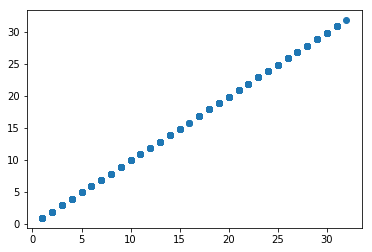

In [6]:
test_predictions = model.predict(test_input.values)
plt.scatter(test_labels.values, test_predictions)
plt.show()